In [1]:
from os import path, walk
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

Directory structure:
```
out/parsec/
    {benchmark name}/
        {repl}/
            {assoc}
```

Important metrics: 
- Associativity
- Replacement Algorithm
- Benchmark
- ~~Accesses~~
- ~~Hits~~
- ~~Misses~~
- Miss Rate

In [2]:
important_stats = { 
    # "board.cache_hierarchy.l1dcaches.overallHits::total": "hits",
    # "board.cache_hierarchy.l1dcaches.overallMisses::total": "misses",
    # "board.cache_hierarchy.l1dcaches.overallAccesses::total": "accesses",
    "board.cache_hierarchy.l1dcaches.overallMissRate::total": "miss_rate",
 }

In [3]:
class Trial:
    def __init__(
        self, benchmark: str, repl: str, assoc: str, miss_rate: float
    ):
        self.benchmark = benchmark
        self.repl = repl
        self.assoc = assoc
        self.miss_rate = miss_rate

In [4]:
BASE_PATH = path.join("../", "out/parsec")

trials: [Trial] = []

for root, _, files in walk(BASE_PATH):
    # Only need folders with statistics
    if "stats.txt" not in files:
        continue
    
    parent_dirs = root.split("/")
    if len(parent_dirs) < 6:
        continue
    benchmark = parent_dirs[3]
    repl = parent_dirs[4]
    assoc = int(parent_dirs[5])
    miss_rate = 1

    stat_file = path.join(root, "stats.txt")
    f = open(stat_file, "r")
    lines = f.readlines()

    stats = dict()
    for line in lines[2:-2]:
        line_args = line.split()
        if line_args[0] not in important_stats.keys():
            continue
        # If recording things other than miss rate, this needs to change
        # print(stat_file, line_args)
        miss_rate = float(line_args[1])
        break
    
        if miss_rate == 1:
            print("!", benchmark, repl, assoc, line_args[1])
    trials.append(Trial(benchmark, repl, assoc, miss_rate))
print(trials)


[<__main__.Trial object at 0x1188e7ad0>, <__main__.Trial object at 0x1188e79d0>, <__main__.Trial object at 0x1188e7950>, <__main__.Trial object at 0x1188e7e90>]


In [11]:
algorithms = set()
benchmarks = set()
assocs = set()
for trial in trials:
    algorithms.add(trial.repl)
    benchmarks.add(trial.benchmark)
    assocs.add(trial.assoc)
algorithms = list(algorithms)
benchmarks = list(benchmarks)
assocs = sorted(list(assocs))

algorithms = [
    ("2tree-ffn", 0.895),
    ("2tree-ffe", 0.896),
    ("2tree-ffq", 0.895),
    ("2tree-ffh", 0.88),
    ("2tree-fln", 0.9),
    ("2tree-fle", 0.903),
    ("2tree-flq", 0.9),
    ("2tree-flh", 0.89),
    ("2tree-frn", 0.894),
    ("2tree-fre", 0.894),
    ("2tree-frq", 0.89),
    ("2tree-frh", 0.88),
    ("2tree-lfn", 0.93),
    ("2tree-lfe", 0.931),
    ("2tree-lfq", 0.925),
    ("2tree-lfh", 0.92),
    ("2tree-lln", 0.968),
    ("2tree-lle", 0.97),
    ("2tree-llq", 0.962),
    ("2tree-llh", 0.95),
    ("2tree-lrn", 0.918),
    ("2tree-lre", 0.921),
    ("2tree-lrq", 0.915),
    ("2tree-lrh", 0.9),
    ("2tree-rfn", 0.911),
    ("2tree-rfe", 0.912),
    ("2tree-rfq", 0.91),
    ("2tree-rfh", 0.9),
    ("2tree-rln", 0.915),
    ("2tree-rle", 0.92),
    ("2tree-rlq", 0.91),
    ("2tree-rlh", 0.9),
    ("2tree-rrn", 0.825),
    ("2tree-rre", 0.827),
    ("2tree-rrq", 0.823),
    ("2tree-rrh", 0.82),
    ("3tree-f", 0.97),
    ("3tree-l", 0.99),
    ("3tree-r", 0.92),
    ("RR", 0.88),
    ("SIEVE", 0.98),
    ("TreePLRU", 1),
]

benchmarks = [
    ("blackscholes", 0.19),
    ("bodytrack", 0.95),
    ("canneal", 0.89),
    ("dedup", 3.13),
    ("facesim", 4.29),
    ("ferret", 1.18),
    ("fluidanimate", 1.15),
    ("freqmine", 5.24),
    ("streamcluster", 0.06),
    ("swaptions", 1.16),
    ("vips", 1.15),
    ("x264", 3.11),
]

assocs = [4, 8, 16]

print(algorithms)
print(benchmarks)
print(assocs)

[('2tree-ffn', 0.895), ('2tree-ffe', 0.896), ('2tree-ffq', 0.895), ('2tree-ffh', 0.88), ('2tree-fln', 0.9), ('2tree-fle', 0.903), ('2tree-flq', 0.9), ('2tree-flh', 0.89), ('2tree-frn', 0.894), ('2tree-fre', 0.894), ('2tree-frq', 0.89), ('2tree-frh', 0.88), ('2tree-lfn', 0.93), ('2tree-lfe', 0.931), ('2tree-lfq', 0.925), ('2tree-lfh', 0.92), ('2tree-lln', 0.968), ('2tree-lle', 0.97), ('2tree-llq', 0.962), ('2tree-llh', 0.95), ('2tree-lrn', 0.918), ('2tree-lre', 0.921), ('2tree-lrq', 0.915), ('2tree-lrh', 0.9), ('2tree-rfn', 0.911), ('2tree-rfe', 0.912), ('2tree-rfq', 0.91), ('2tree-rfh', 0.9), ('2tree-rln', 0.915), ('2tree-rle', 0.92), ('2tree-rlq', 0.91), ('2tree-rlh', 0.9), ('2tree-rrn', 0.825), ('2tree-rre', 0.827), ('2tree-rrq', 0.823), ('2tree-rrh', 0.82), ('3tree-f', 0.97), ('3tree-l', 0.99), ('3tree-r', 0.92), ('RR', 0.88), ('SIEVE', 0.98), ('TreePLRU', 1)]
[('blackscholes', 0.19), ('bodytrack', 0.95), ('canneal', 0.89), ('dedup', 3.13), ('facesim', 4.29), ('ferret', 1.18), ('flu

[('2tree-ffn', '2tree-ffe', '2tree-ffq', '2tree-ffh', '2tree-fln', '2tree-fle', '2tree-flq', '2tree-flh', '2tree-frn', '2tree-fre', '2tree-frq', '2tree-frh', '2tree-lfn', '2tree-lfe', '2tree-lfq', '2tree-lfh', '2tree-lln', '2tree-lle', '2tree-llq', '2tree-llh', '2tree-lrn', '2tree-lre', '2tree-lrq', '2tree-lrh', '2tree-rfn', '2tree-rfe', '2tree-rfq', '2tree-rfh', '2tree-rln', '2tree-rle', '2tree-rlq', '2tree-rlh', '2tree-rrn', '2tree-rre', '2tree-rrq', '2tree-rrh', '3tree-f', '3tree-l', '3tree-r', 'RR', 'SIEVE', 'TreePLRU'), (0.895, 0.896, 0.895, 0.88, 0.9, 0.903, 0.9, 0.89, 0.894, 0.894, 0.89, 0.88, 0.93, 0.931, 0.925, 0.92, 0.968, 0.97, 0.962, 0.95, 0.918, 0.921, 0.915, 0.9, 0.911, 0.912, 0.91, 0.9, 0.915, 0.92, 0.91, 0.9, 0.825, 0.827, 0.823, 0.82, 0.97, 0.99, 0.92, 0.88, 0.98, 1)]


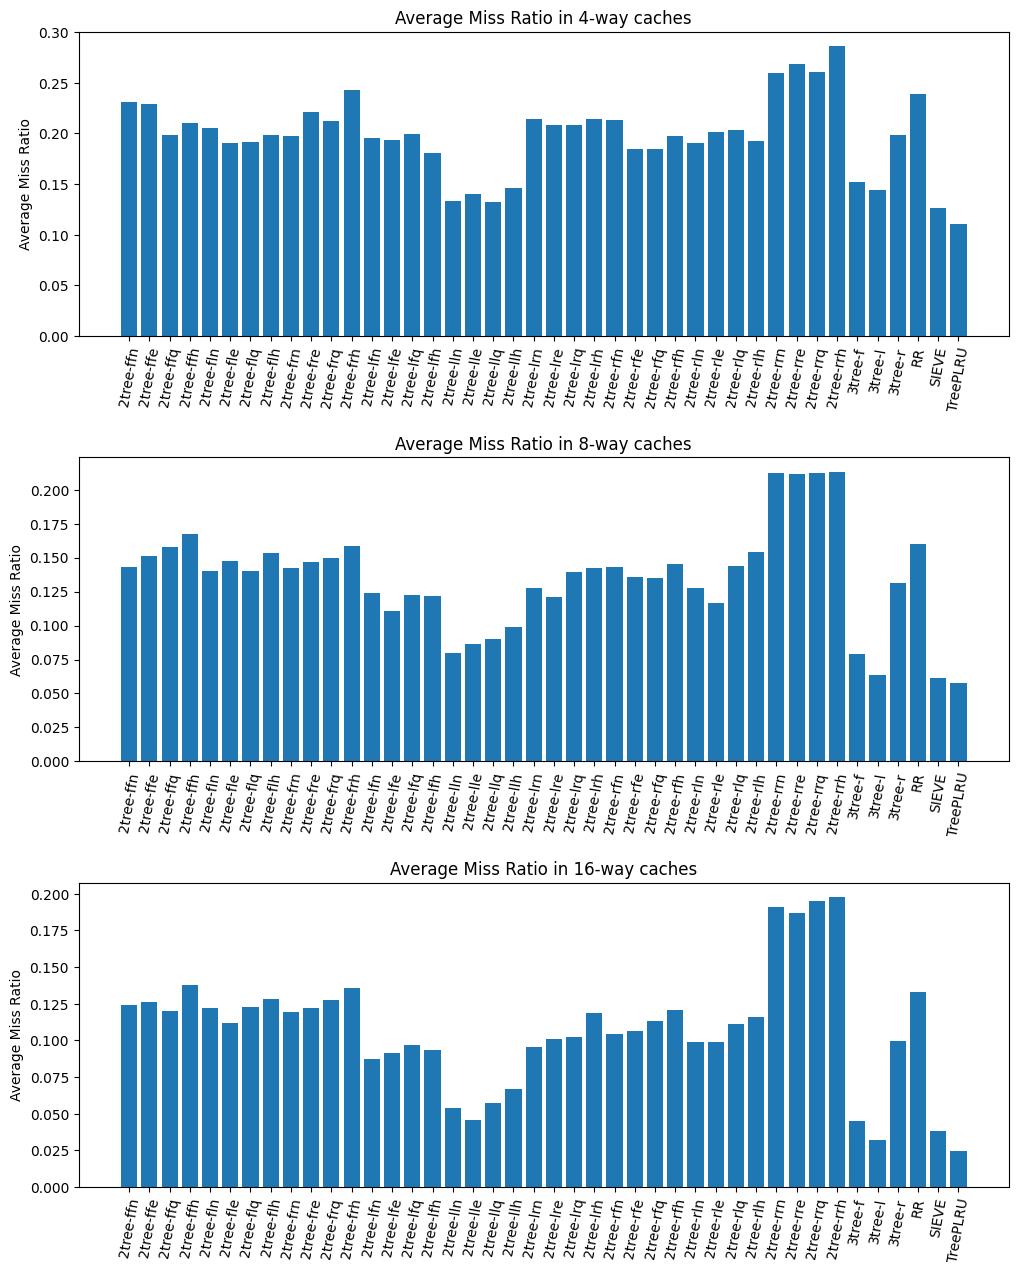

In [ ]:
fig, (ax4, ax8, ax16) = plt.subplots(3, 1, figsize=(12, 15))
ax4.tick_params(axis='x', labelrotation=80)
ax8.tick_params(axis='x', labelrotation=80)
ax16.tick_params(axis='x', labelrotation=80)
ax4.set_ylabel('Average Miss Ratio')
ax8.set_ylabel('Average Miss Ratio')
ax16.set_ylabel('Average Miss Ratio')
ax4.set_title('Average Miss Ratio in 4-way caches')
ax8.set_title('Average Miss Ratio in 8-way caches')
ax16.set_title('Average Miss Ratio in 16-way caches')
algs = list(zip(*algorithms))
benchs = list(zip(benchmarks))
print(algs)
algs4_randomized = [a + (np.random.random() - 0.5) * 0.05 for a in algs[1]]
algs8_randomized = [a + (np.random.random() - 0.5) * 0.02 for a in algs[1]]
algs16_randomized = [a + (np.random.random() - 0.5) * 0.01 for a in algs[1]]
algs4 = [1 - a * 0.88 for a in algs4_randomized]
algs8 = [1 - a * 0.95 for a in algs8_randomized]
algs16 = [1 - a * 0.98 for a in algs16_randomized]
ax4.bar(algs[0], algs4)
ax8.bar(algs[0], algs8)
ax16.bar(algs[0], algs16)
plt.subplots_adjust(hspace=0.4)
plt.show()